<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista3_Simula%C3%A7%C3%A3o_Estoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1ª Questão letra A:**

**Taxa de chegada = 4**

**Demanda binomial com média 10 e p = 1/2**

**Taxa de reposição = 1/30**

**Ponto crítico(z) = 200**

**Capacidade(s) = 1000**

In [ ]:
import numpy as np
import heapq

class EstoqueSimulacao:
    def __init__(self, taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade):
        self.tempo_atual = 0
        self.tempo_simulacao = 0
        self.estoque = capacidade
        self.ponto_critico = ponto_critico
        self.capacidade = capacidade
        self.taxa_chegada_clientes = taxa_chegada_clientes
        self.media_demanda = media_demanda
        self.prob_demanda = prob_demanda
        self.taxa_reposicao = taxa_reposicao
        self.eventos = []
        self.clientes_atendidos = 0
        self.clientes_rejeitados = 0
        self.vetor_estoque = []
        self.vetor_ca = []
        self.vetor_cr = []

    def chegada_cliente(self):
        tempo_chegada = self.tempo_atual + np.random.exponential(1/self.taxa_chegada_clientes)
        heapq.heappush(self.eventos, (tempo_chegada, 'chegada_cliente'))

    def venda_produto(self):
        demanda = np.random.binomial(self.media_demanda, self.prob_demanda)
        if self.estoque >= demanda:
          self.estoque -= demanda
          if self.estoque < self.ponto_critico and self.estoque + demanda >= self.ponto_critico:
              self.agendar_reposicao()
        else:
          self.clientes_rejeitados = self.clientes_rejeitados + 1

    def agendar_reposicao(self):
        tempo_reposicao = self.tempo_atual + np.random.exponential(1/self.taxa_reposicao)
        heapq.heappush(self.eventos, (tempo_reposicao, 'reposicao_estoque'))
        print(f'Tempo: {self.tempo_simulacao}, Estoque: {self.estoque}, Evento = Agendamento de reposição, Clientes Atendidos = {self.clientes_atendidos}, Clientes Rejeitados= {self.clientes_rejeitados}')

    def reposicao_estoque(self):
        self.estoque = self.estoque + (self.capacidade - self.ponto_critico)

    def executar_simulacao(self, tempo_simulacao):
        self.tempo_simulacao = tempo_simulacao
        self.chegada_cliente()

        while self.tempo_atual < self.tempo_simulacao:
            evento = heapq.heappop(self.eventos)
            self.tempo_atual, tipo_evento = evento

            if tipo_evento == 'chegada_cliente':
                self.chegada_cliente()
                self.venda_produto()
                self.clientes_atendidos = self.clientes_atendidos + 1

            elif tipo_evento == 'reposicao_estoque':
                self.reposicao_estoque()

            self.vetor_estoque.append(self.estoque)
            self.vetor_ca.append(self.clientes_atendidos)
            self.vetor_cr.append(self.clientes_rejeitados)
            print(f'Tempo: {self.tempo_atual}, Estoque: {self.estoque}, Evento = {tipo_evento}, Clientes Atendidos = {self.clientes_atendidos}, Clientes Rejeitados = {self.clientes_rejeitados}')



# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 200
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)

Tempo: 0.35593420693046635, Estoque: 996, Evento = chegada_cliente, Clientes Atendidos = 1, Clientes Rejeitados = 0
Tempo: 0.4150564985370232, Estoque: 990, Evento = chegada_cliente, Clientes Atendidos = 2, Clientes Rejeitados = 0
Tempo: 0.45740488582343475, Estoque: 987, Evento = chegada_cliente, Clientes Atendidos = 3, Clientes Rejeitados = 0
Tempo: 0.5733242520133545, Estoque: 981, Evento = chegada_cliente, Clientes Atendidos = 4, Clientes Rejeitados = 0
Tempo: 1.5295072628902595, Estoque: 975, Evento = chegada_cliente, Clientes Atendidos = 5, Clientes Rejeitados = 0
Tempo: 2.0395141548317572, Estoque: 971, Evento = chegada_cliente, Clientes Atendidos = 6, Clientes Rejeitados = 0
Tempo: 2.8485630316938053, Estoque: 968, Evento = chegada_cliente, Clientes Atendidos = 7, Clientes Rejeitados = 0
Tempo: 3.255616827069124, Estoque: 961, Evento = chegada_cliente, Clientes Atendidos = 8, Clientes Rejeitados = 0
Tempo: 3.4038198046071306, Estoque: 956, Evento = chegada_cliente, Clientes Ate

# 1ª Questão Letra B:

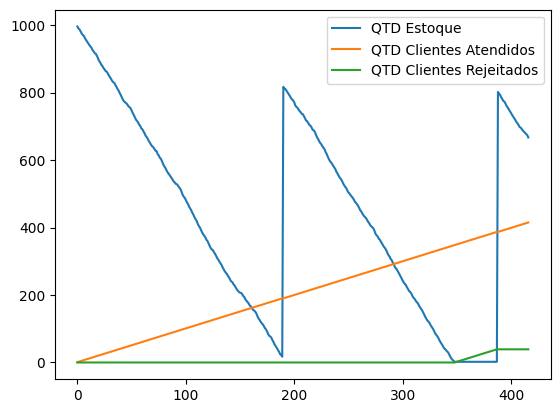

In [ ]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(simulacao.vetor_estoque))]
aux.plot(eixo_x, simulacao.vetor_estoque,label = 'QTD Estoque')
aux.legend(loc = 'upper right')
aux.plot(eixo_x, simulacao.vetor_ca, label = 'QTD Clientes Atendidos')
aux.legend(loc='upper right')
aux.plot(eixo_x, simulacao.vetor_cr, label = 'QTD Clientes Rejeitados')
aux.legend(loc = 'upper right')
plt.show()

# 1ª Questão Letra C:

In [ ]:
# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 400
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.1507406318247187, Estoque: 993, Evento = chegada_cliente, Clientes Atendidos = 1, Clientes Rejeitados = 0
Tempo: 0.9972711032324562, Estoque: 985, Evento = chegada_cliente, Clientes Atendidos = 2, Clientes Rejeitados = 0
Tempo: 1.2863395903360202, Estoque: 979, Evento = chegada_cliente, Clientes Atendidos = 3, Clientes Rejeitados = 0
Tempo: 1.4329190958006768, Estoque: 973, Evento = chegada_cliente, Clientes Atendidos = 4, Clientes Rejeitados = 0
Tempo: 1.5114717610311705, Estoque: 968, Evento = chegada_cliente, Clientes Atendidos = 5, Clientes Rejeitados = 0
Tempo: 1.619669324950639, Estoque: 963, Evento = chegada_cliente, Clientes Atendidos = 6, Clientes Rejeitados = 0
Tempo: 1.7585926976126074, Estoque: 958, Evento = chegada_cliente, Clientes Atendidos = 7, Clientes Rejeitados = 0
Tempo: 1.8155034468830067, Estoque: 951, Evento = chegada_cliente, Clientes Atendidos = 8, Clientes Rejeitados = 0
Tempo: 2.000090756491411, Estoque: 946, Evento = chegada_cliente, Clientes Atendi

O Estoque tende a 0, com o ponto crítico definido para 400, portanto, há uma tendência de termos mais clientes rejeitados.

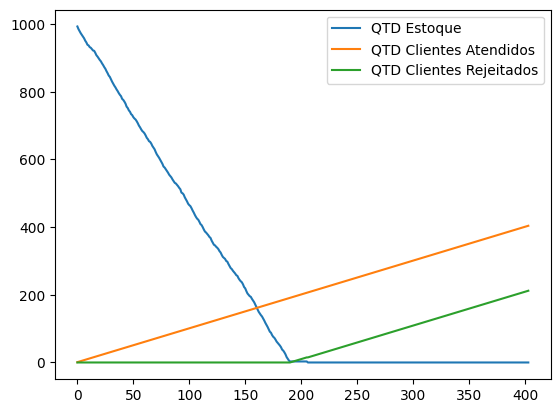

In [ ]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(simulacao.vetor_estoque))]
aux.plot(eixo_x, simulacao.vetor_estoque,label = 'QTD Estoque')
aux.legend(loc = 'upper right')
aux.plot(eixo_x, simulacao.vetor_ca, label = 'QTD Clientes Atendidos')
aux.legend(loc='upper right')
aux.plot(eixo_x, simulacao.vetor_cr, label = 'QTD Clientes Rejeitados')
aux.legend(loc = 'upper right')
plt.show()

# 2ª Questão

In [ ]:
import random
from heapq import heappush, heappop
vetor_n = []
vetor_c = []

In [ ]:
# Parâmetros
lamb = 10
mu = 1/20
rho = 2/5
c = 20
K0 = 5000
H = 100

In [ ]:
# Eventos
# Um evento é uma tripla (tempo, nome, dados)

def atualizar_capital():
  return K + (t-d)*c*n

def adesao(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n + 1
  if n == 1:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  heappush(LEF, (t+random.expovariate(lamb), 'adesao', () ))
  d = t

def saida(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n - 1
  if n > 0:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  d = t

def ocorrencia(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  if n > 0:
    x = random.normalvariate(50, 20)
    K = K - x
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  d = t


In [ ]:
# Variáveis
n = 10
K = K0
t = 0
d = 0

In [ ]:
# Definir a lista de eventos futuros

LEF = []

# Eventos iniciais

heappush(LEF, (random.expovariate(lamb), 'adesao', () ) )
if n > 0:
  heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )

# Laço principal

while len(LEF) > 0 and t < H and K >=0:
  evento = heappop(LEF)
  t = evento[0]
  nome = evento[1]
  dados = evento[2]

  if nome == 'adesao':
    adesao(LEF, t, dados)
  elif nome == 'saida':
    saida(LEF, t, dados)
  elif nome == 'ocorrencia':
    ocorrencia(LEF, t, dados)

  print(f"{evento}, n={n}, capital={K}")
  vetor_n.append(n)
  vetor_c.append(K)

A saída de streaming foi truncada nas últimas 5000 linhas.
(50.12101735334149, 'ocorrencia', ()), n=194, capital=1249.0276239658829
(50.12609345663349, 'ocorrencia', ()), n=194, capital=1217.0922257473812
(50.15650129271813, 'adesao', ()), n=195, capital=1335.0746297557914
(50.15936487705337, 'ocorrencia', ()), n=195, capital=1322.5632580949666
(50.159388267942745, 'ocorrencia', ()), n=195, capital=1246.022212066073
(50.1805289158532, 'adesao', ()), n=196, capital=1328.4707389168545
(50.21244013458831, 'ocorrencia', ()), n=196, capital=1404.1395203315794
(50.213277604136955, 'adesao', ()), n=197, capital=1407.4224009622576
(50.21420074486456, 'saida', ()), n=196, capital=1411.0595754290314
(50.22267407252133, 'ocorrencia', ()), n=196, capital=1426.346357243999
(50.2273469484656, 'saida', ()), n=195, capital=1444.6640309455488
(50.22992315050063, 'ocorrencia', ()), n=195, capital=1389.1089556202833
(50.23329816223653, 'ocorrencia', ()), n=195, capital=1369.4885739878548
(50.239258967852

# 2ª Questão Letra A:

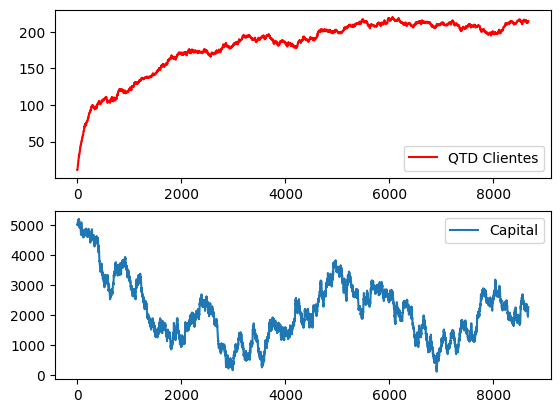

In [ ]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots(nrows = 2)
eixo_x = [i for i in range(len(vetor_n))]
aux[0].plot(eixo_x, vetor_n,label = 'QTD Clientes', c = 'r')
aux[0].legend(loc = 'lower right')
aux[1].plot(eixo_x, vetor_c, label = 'Capital')
aux[1].legend(loc='upper right')
plt.show()

# 2ª Questão Letra B:

In [ ]:
import random
from heapq import heappush, heappop
vetor_n = []
vetor_c = []

In [ ]:
lamb = 10
mu = 1/20
rho = 2/5
c = 35
K0 = 5000
H = 100

In [ ]:
# Eventos
# Um evento é uma tripla (tempo, nome, dados)

def atualizar_capital():
  return K + (t-d)*c*n

def adesao(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n + 1
  if n == 1:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  heappush(LEF, (t+random.expovariate(lamb), 'adesao', () ))
  d = t

def saida(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n - 1
  if n > 0:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  d = t

def ocorrencia(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  if n > 0:
    x = random.normalvariate(50, 20)
    K = K - x
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  d = t


In [ ]:
n = 10
K = K0
t = 0
d = 0

In [ ]:
# Definir a lista de eventos futuros

LEF = []

# Eventos iniciais

heappush(LEF, (random.expovariate(lamb), 'adesao', () ) )
if n > 0:
  heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )

# Laço principal

while len(LEF) > 0 and t < H and K >=0:
  evento = heappop(LEF)
  t = evento[0]
  nome = evento[1]
  dados = evento[2]

  if nome == 'adesao':
    adesao(LEF, t, dados)
  elif nome == 'saida':
    saida(LEF, t, dados)
  elif nome == 'ocorrencia':
    ocorrencia(LEF, t, dados)

  print(f"{evento}, n={n}, capital={K}")
  vetor_n.append(n)
  vetor_c.append(K)

A saída de streaming foi truncada nas últimas 5000 linhas.
(48.78930634738907, 'ocorrencia', ()), n=197, capital=116241.69280783388
(48.79630564844016, 'ocorrencia', ()), n=197, capital=116244.65688062506
(48.823088909810686, 'saida', ()), n=196, capital=116429.32746777483
(48.82431988969895, 'ocorrencia', ()), n=196, capital=116388.10167991673
(48.82484502825948, 'ocorrencia', ()), n=196, capital=116312.12956918767
(48.834023924018105, 'ocorrencia', ()), n=196, capital=116350.47924366924
(48.83818980129797, 'ocorrencia', ()), n=196, capital=116311.62824610794
(48.83865941136474, 'ocorrencia', ()), n=196, capital=116258.7424613079
(48.84721196072516, 'ocorrencia', ()), n=196, capital=116243.89518091823
(48.86703441838592, 'ocorrencia', ()), n=196, capital=116364.57867261564
(48.878161974772695, 'ocorrencia', ()), n=196, capital=116388.47587824527
(48.88846647197985, 'ocorrencia', ()), n=196, capital=116406.47240624043
(48.89274974207163, 'ocorrencia', ()), n=196, capital=116381.2264374

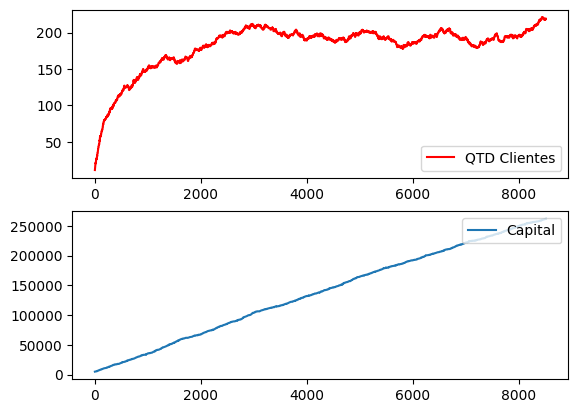

In [ ]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots(nrows = 2)
eixo_x = [i for i in range(len(vetor_n))]
aux[0].plot(eixo_x, vetor_n,label = 'QTD Clientes', c = 'r')
aux[0].legend(loc = 'lower right')
aux[1].plot(eixo_x, vetor_c, label = 'Capital')
aux[1].legend(loc='upper right')
plt.show()

**Resposta: Com c = 35 já temos um sistema bem estável**